In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [38]:
df= pd.read_csv('Laptop_price.csv')

In [39]:
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [40]:
X = df.drop('Price', axis=1)

In [41]:
y = df['Price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:

def explain_model1(model, X_train, X_test, y_train, y_test, features=None):
    print('Test Results:')
    y_pred_test = model.predict(X_test)
    print(f'R² Score: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test):.4f}')
    print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test):.4f}')
    print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')

    print('\nTrain Results:')
    y_pred_train = model.predict(X_train)
    print(f'R² Score: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train):.4f}')
    print(f'Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train):.4f}')
    print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}')

    print('\n')

In [44]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)


In [45]:
model = xgb.XGBRegressor(
    enable_categorical = True,

    max_depth = 3,
    min_child_weight = 5,
    reg_alpha = 1.0,
    reg_lambda = 1.0,
    gamma = 0.5,
    learning_rate= 0.1,
    n_estimators = 50,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)

In [46]:
model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)],verbose=True)

[0]	validation_0-rmse:8439.86242	validation_1-rmse:8586.02863
[1]	validation_0-rmse:7605.06709	validation_1-rmse:7736.85110
[2]	validation_0-rmse:6852.42639	validation_1-rmse:6971.20402
[3]	validation_0-rmse:6173.94941	validation_1-rmse:6284.64054
[4]	validation_0-rmse:5562.72408	validation_1-rmse:5666.16830
[5]	validation_0-rmse:5013.77789	validation_1-rmse:5108.58651
[6]	validation_0-rmse:4519.44570	validation_1-rmse:4600.60982
[7]	validation_0-rmse:4499.61948	validation_1-rmse:4599.44478
[8]	validation_0-rmse:4056.61961	validation_1-rmse:4151.13395
[9]	validation_0-rmse:3656.90236	validation_1-rmse:3745.14850
[10]	validation_0-rmse:3299.54065	validation_1-rmse:3381.51588
[11]	validation_0-rmse:2976.26712	validation_1-rmse:3048.35410
[12]	validation_0-rmse:2686.80727	validation_1-rmse:2753.54229
[13]	validation_0-rmse:2424.00124	validation_1-rmse:2485.33213
[14]	validation_0-rmse:2188.31326	validation_1-rmse:2244.77930
[15]	validation_0-rmse:1977.78899	validation_1-rmse:2032.05949
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

In [56]:
explain_model1(model, X_train, X_test, y_train, y_test)

Test Results:
R² Score: 0.9991
Mean Absolute Error (MAE): 224.4569
Mean Squared Error (MSE): 81001.8935
Root Mean Squared Error (RMSE): 284.6083

Train Results:
R² Score: 0.9993
Mean Absolute Error (MAE): 193.0393
Mean Squared Error (MSE): 60779.6434
Root Mean Squared Error (RMSE): 246.5353




In [57]:
plt.figure(figsize=(20, 10))
plot_tree(model, 
              filled=True,
              feature_names = None,
              class_names=True,
              rounded=True,
              fontsize=10)
plt.title("Visualization", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...) instead.

<Figure size 2000x1000 with 0 Axes>

In [51]:
model.booster

In [52]:
model.feature_importances_

array([2.1158149e-03, 1.7658025e-03, 9.9104667e-01, 1.3004947e-03,
       3.4869511e-03, 2.7580705e-04, 8.4425437e-06, 0.0000000e+00,
       0.0000000e+00], dtype=float32)

In [58]:
booster = model.get_booster()


In [59]:
booster.num_boosted_rounds()


50

C:\Users\ufml\anaconda3\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

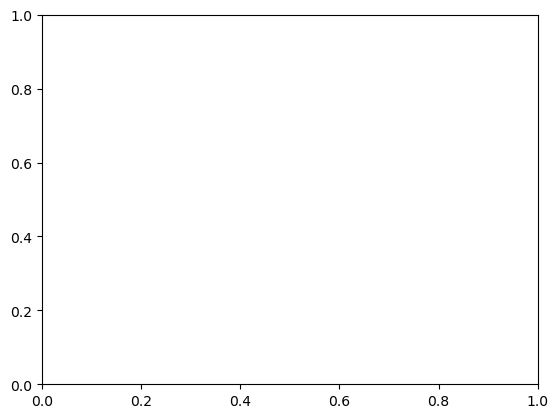

In [60]:
xgb.plot_tree(booster, num_trees=0)
plt.show()

In [62]:
lrmodel = LinearRegression()

In [64]:
lrmodel.fit(X_train, y_train)

LinearRegression()

In [65]:
explain_model1(lrmodel, X_train, X_test, y_train, y_test)

Test Results:
R² Score: 0.9996
Mean Absolute Error (MAE): 146.2249
Mean Squared Error (MSE): 32304.7373
Root Mean Squared Error (RMSE): 179.7352

Train Results:
R² Score: 0.9995
Mean Absolute Error (MAE): 155.6473
Mean Squared Error (MSE): 39818.6792
Root Mean Squared Error (RMSE): 199.5462




In [66]:
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [67]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [68]:
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [69]:
X_train

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
29,3.799639,8,1000,12.853007,2.151678,True,False,False,False
535,3.298004,16,512,15.144079,2.587267,False,False,False,False
695,2.433129,4,512,15.046398,2.264456,False,False,True,False
557,3.313144,32,512,12.836309,2.376126,False,False,False,False
836,3.162279,16,512,14.701664,2.943887,False,False,True,False
...,...,...,...,...,...,...,...,...,...
106,1.953589,32,256,14.320274,3.534916,False,False,False,True
270,2.096943,16,1000,14.492863,4.989697,False,False,False,True
860,2.884506,4,1000,11.458639,4.942381,False,True,False,False
435,2.074887,4,256,15.417373,2.991174,True,False,False,False


In [70]:
explain_model1(lrmodel, X_train, X_test, y_train, y_test)

Test Results:
R² Score: 0.9996
Mean Absolute Error (MAE): 146.2249
Mean Squared Error (MSE): 32304.7373
Root Mean Squared Error (RMSE): 179.7352

Train Results:
R² Score: 0.9995
Mean Absolute Error (MAE): 155.6473
Mean Squared Error (MSE): 39818.6792
Root Mean Squared Error (RMSE): 199.5462




In [77]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

In [78]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
lrmodel.fit(X,y)

LinearRegression()

In [82]:
explain_model1(lrmodel, X1_train, X1_test, y1_train, y1_test)

Test Results:
R² Score: 0.5833
Mean Absolute Error (MAE): 0.5343
Mean Squared Error (MSE): 0.5460
Root Mean Squared Error (RMSE): 0.7390

Train Results:
R² Score: 0.6118
Mean Absolute Error (MAE): 0.5304
Mean Squared Error (MSE): 0.5189
Root Mean Squared Error (RMSE): 0.7203




In [83]:
model.fit(X1_train, y1_train, eval_set = [(X1_train, y1_train), (X1_test, y1_test)],verbose=True)

[0]	validation_0-rmse:1.09568	validation_1-rmse:1.08707
[1]	validation_0-rmse:1.06721	validation_1-rmse:1.05878
[2]	validation_0-rmse:1.02116	validation_1-rmse:1.01459
[3]	validation_0-rmse:0.97680	validation_1-rmse:0.97187
[4]	validation_0-rmse:0.94170	validation_1-rmse:0.93873
[5]	validation_0-rmse:0.90775	validation_1-rmse:0.90708
[6]	validation_0-rmse:0.87873	validation_1-rmse:0.87993
[7]	validation_0-rmse:0.85285	validation_1-rmse:0.85629
[8]	validation_0-rmse:0.82950	validation_1-rmse:0.83427
[9]	validation_0-rmse:0.81426	validation_1-rmse:0.81898
[10]	validation_0-rmse:0.79612	validation_1-rmse:0.80202
[11]	validation_0-rmse:0.78100	validation_1-rmse:0.78798
[12]	validation_0-rmse:0.76626	validation_1-rmse:0.77385
[13]	validation_0-rmse:0.75594	validation_1-rmse:0.76334
[14]	validation_0-rmse:0.74305	validation_1-rmse:0.75182
[15]	validation_0-rmse:0.72811	validation_1-rmse:0.73812
[16]	validation_0-rmse:0.71840	validation_1-rmse:0.72934
[17]	validation_0-rmse:0.70769	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

In [85]:
explain_model1(model, X1_train, X1_test, y1_train, y1_test)

Test Results:
R² Score: 0.7417
Mean Absolute Error (MAE): 0.4064
Mean Squared Error (MSE): 0.3384
Root Mean Squared Error (RMSE): 0.5817

Train Results:
R² Score: 0.7645
Mean Absolute Error (MAE): 0.3978
Mean Squared Error (MSE): 0.3149
Root Mean Squared Error (RMSE): 0.5611




In [ ]:
#Higher values because its a better and bigger dataset